In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,root_mean_squared_error,mean_absolute_error
pd.set_option('display.max_columns', None)

In [2]:
main_df1 = pd.read_csv("../data/raw/my_8month2025.csv")
main_df2 = pd.read_csv("../data/raw/ems_2024.csv")

In [3]:
main_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1079491 entries, 0 to 1079490
Data columns (total 31 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   cad_incident_id                 1079491 non-null  int64  
 1   incident_datetime               1079491 non-null  object 
 2   initial_call_type               1079491 non-null  object 
 3   initial_severity_level_code     1079491 non-null  int64  
 4   final_call_type                 1079491 non-null  object 
 5   final_severity_level_code       1079491 non-null  int64  
 6   first_assignment_datetime       1056283 non-null  object 
 7   valid_dispatch_rspns_time_indc  1079491 non-null  object 
 8   dispatch_response_seconds_qy    1079491 non-null  int64  
 9   first_activation_datetime       1054306 non-null  object 
 10  first_on_scene_datetime         1014350 non-null  object 
 11  valid_incident_rspns_time_indc  1079491 non-null  object 
 12  

In [4]:
main_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600996 entries, 0 to 1600995
Data columns (total 31 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   cad_incident_id                 1600996 non-null  int64  
 1   incident_datetime               1600996 non-null  object 
 2   initial_call_type               1600996 non-null  object 
 3   initial_severity_level_code     1600996 non-null  int64  
 4   final_call_type                 1600996 non-null  object 
 5   final_severity_level_code       1600996 non-null  int64  
 6   first_assignment_datetime       1571740 non-null  object 
 7   valid_dispatch_rspns_time_indc  1600996 non-null  object 
 8   dispatch_response_seconds_qy    1600996 non-null  int64  
 9   first_activation_datetime       1568623 non-null  object 
 10  first_on_scene_datetime         1511169 non-null  object 
 11  valid_incident_rspns_time_indc  1600996 non-null  object 
 12  

In [5]:
main_df1.columns

Index(['cad_incident_id', 'incident_datetime', 'initial_call_type',
       'initial_severity_level_code', 'final_call_type',
       'final_severity_level_code', 'first_assignment_datetime',
       'valid_dispatch_rspns_time_indc', 'dispatch_response_seconds_qy',
       'first_activation_datetime', 'first_on_scene_datetime',
       'valid_incident_rspns_time_indc', 'incident_travel_tm_seconds_qy',
       'incident_close_datetime', 'held_indicator',
       'incident_disposition_code', 'borough', 'incident_dispatch_area',
       'zipcode', 'policeprecinct', 'citycouncildistrict', 'communitydistrict',
       'communityschooldistrict', 'congressionaldistrict', 'reopen_indicator',
       'special_event_indicator', 'standby_indicator', 'transfer_indicator',
       'incident_response_seconds_qy', 'first_to_hosp_datetime',
       'first_hosp_arrival_datetime'],
      dtype='object')

In [6]:
main_df2.columns

Index(['cad_incident_id', 'incident_datetime', 'initial_call_type',
       'initial_severity_level_code', 'final_call_type',
       'final_severity_level_code', 'first_assignment_datetime',
       'valid_dispatch_rspns_time_indc', 'dispatch_response_seconds_qy',
       'first_activation_datetime', 'first_on_scene_datetime',
       'valid_incident_rspns_time_indc', 'incident_response_seconds_qy',
       'incident_travel_tm_seconds_qy', 'incident_close_datetime',
       'held_indicator', 'incident_disposition_code', 'borough',
       'incident_dispatch_area', 'zipcode', 'policeprecinct',
       'citycouncildistrict', 'communitydistrict', 'communityschooldistrict',
       'congressionaldistrict', 'reopen_indicator', 'special_event_indicator',
       'standby_indicator', 'transfer_indicator', 'first_to_hosp_datetime',
       'first_hosp_arrival_datetime'],
      dtype='object')

In [7]:
main_df = pd.concat([main_df1, main_df2], ignore_index=True)

In [8]:
main_df.head()

,cad_incident_id,incident_datetime,initial_call_type,initial_severity_level_code,final_call_type,final_severity_level_code,first_assignment_datetime,valid_dispatch_rspns_time_indc,dispatch_response_seconds_qy,first_activation_datetime,first_on_scene_datetime,valid_incident_rspns_time_indc,incident_travel_tm_seconds_qy,incident_close_datetime,held_indicator,incident_disposition_code,borough,incident_dispatch_area,zipcode,policeprecinct,citycouncildistrict,communitydistrict,communityschooldistrict,congressionaldistrict,reopen_indicator,special_event_indicator,standby_indicator,transfer_indicator,incident_response_seconds_qy,first_to_hosp_datetime,first_hosp_arrival_datetime
0,250010001,2025-01-01 00:00:12,STNDBY,8,STNDBY,8,2025-01-01T09:53:41.000,N,0,2025-01-01T09:57:09.000,2025-01-01T09:53:56.000,N,15.0,2025-01-01T14:03:04.000,N,91,BROOKLYN,CW,11224.0,60.0,47.0,313.0,21.0,8.0,Y,N,Y,N,NaN,NaN,NaN
1,250010003,2025-01-01 00:01:53,UNC,2,UNC,2,2025-01-01T00:02:06.000,Y,13,2025-01-01T00:02:43.000,2025-01-01T00:09:27.000,Y,441.0,2025-01-01T01:32:53.000,N,82,MANHATTAN,M2,10001.0,10.0,3.0,104.0,2.0,10.0,N,N,N,N,454.0,2025-01-01T00:21:01.000,2025-01-01T00:39:03.000
2,250010004,2025-01-01 00:01:58,CARD,3,CARD,3,2025-01-01T00:01:58.000,Y,0,2025-01-01T00:01:58.000,2025-01-01T00:01:58.000,Y,0.0,2025-01-01T00:10:49.000,N,93,MANHATTAN,M3,10036.0,14.0,3.0,104.0,2.0,10.0,N,N,N,N,0.0,NaN,NaN
3,250010007,2025-01-01 00:03:42,ABDPN,5,ABDPN,5,2025-01-01T00:03:59.000,Y,17,2025-01-01T00:04:12.000,2025-01-01T00:14:36.000,Y,637.0,2025-01-01T01:22:42.000,N,82,MANHATTAN,M9,10040.0,34.0,10.0,112.0,6.0,13.0,N,N,N,N,654.0,2025-01-01T00:28:30.000,2025-01-01T00:37:31.000
4,250010008,2025-01-01 00:04:36,STATEP,2,STATEP,2,2025-01-01T00:05:06.000,Y,30,2025-01-01T00:05:18.000,2025-01-01T00:09:20.000,Y,254.0,2025-01-01T01:36:32.000,N,82,BRONX,B4,10466.0,47.0,12.0,212.0,11.0,16.0,N,N,N,N,284.0,2025-01-01T00:40:27.000,2025-01-01T00:50:50.000


In [9]:

#drop_cols = ['travel_time_sec', 'dispatch_response_sec', 'close_time', 'hospital_arrival_time', 'to_hospital_time', 'on_scene_time', 'activation_time', 'assignment_time', 'final_severity', 'final_type']
#main_drop_cols = ['incident_response_sec','travel_time_sec', 'dispatch_response_sec', 'close_time', 'hospital_arrival_time', 'to_hospital_time', 'on_scene_time', 'activation_time', 'assignment_time', 'final_severity', 'final_type'] 

In [10]:
drop_cols = ["incident_travel_tm_seconds_qy","dispatch_response_seconds_qy","incident_close_datetime","first_hosp_arrival_datetime", "first_to_hosp_datetime","first_on_scene_datetime","first_activation_datetime","first_assignment_datetime","final_severity_level_code","final_call_type"]



In [11]:
main_df = main_df.drop(columns=drop_cols)

In [12]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2680487 entries, 0 to 2680486
Data columns (total 21 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   cad_incident_id                 int64  
 1   incident_datetime               object 
 2   initial_call_type               object 
 3   initial_severity_level_code     int64  
 4   valid_dispatch_rspns_time_indc  object 
 5   valid_incident_rspns_time_indc  object 
 6   held_indicator                  object 
 7   incident_disposition_code       object 
 8   borough                         object 
 9   incident_dispatch_area          object 
 10  zipcode                         float64
 11  policeprecinct                  float64
 12  citycouncildistrict             float64
 13  communitydistrict               float64
 14  communityschooldistrict         float64
 15  congressionaldistrict           float64
 16  reopen_indicator                object 
 17  special_event_indicator    

In [13]:
main_df.isna().sum()

cad_incident_id                        0
incident_datetime                      0
initial_call_type                      0
initial_severity_level_code            0
valid_dispatch_rspns_time_indc         0
valid_incident_rspns_time_indc         0
held_indicator                         0
incident_disposition_code              0
borough                                0
incident_dispatch_area                 0
zipcode                            45889
policeprecinct                     45802
citycouncildistrict                45802
communitydistrict                  45804
communityschooldistrict            47714
congressionaldistrict              45802
reopen_indicator                       0
special_event_indicator                0
standby_indicator                      0
transfer_indicator                     0
incident_response_seconds_qy      155559
dtype: int64

In [14]:
main_df['cad_incident_id']

0          250010001
1          250010003
2          250010004
3          250010007
4          250010008
             ...    
2680482    243660212
2680483    243660214
2680484    243660215
2680485    243660217
2680486    243660218
Name: cad_incident_id, Length: 2680487, dtype: int64

In [15]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2680487 entries, 0 to 2680486
Data columns (total 21 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   cad_incident_id                 int64  
 1   incident_datetime               object 
 2   initial_call_type               object 
 3   initial_severity_level_code     int64  
 4   valid_dispatch_rspns_time_indc  object 
 5   valid_incident_rspns_time_indc  object 
 6   held_indicator                  object 
 7   incident_disposition_code       object 
 8   borough                         object 
 9   incident_dispatch_area          object 
 10  zipcode                         float64
 11  policeprecinct                  float64
 12  citycouncildistrict             float64
 13  communitydistrict               float64
 14  communityschooldistrict         float64
 15  congressionaldistrict           float64
 16  reopen_indicator                object 
 17  special_event_indicator    

In [16]:
main_df['incident_datetime'] = pd.to_datetime(
    main_df['incident_datetime'],
    format='mixed'
)

In [17]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2680487 entries, 0 to 2680486
Data columns (total 21 columns):
 #   Column                          Dtype         
---  ------                          -----         
 0   cad_incident_id                 int64         
 1   incident_datetime               datetime64[ns]
 2   initial_call_type               object        
 3   initial_severity_level_code     int64         
 4   valid_dispatch_rspns_time_indc  object        
 5   valid_incident_rspns_time_indc  object        
 6   held_indicator                  object        
 7   incident_disposition_code       object        
 8   borough                         object        
 9   incident_dispatch_area          object        
 10  zipcode                         float64       
 11  policeprecinct                  float64       
 12  citycouncildistrict             float64       
 13  communitydistrict               float64       
 14  communityschooldistrict         float64       
 15

In [18]:
main_df['incident_datetime'].isna().sum()

np.int64(0)

In [19]:
main_df['incident_datetime'].sample(10)

64453     2025-01-15 13:22:36
1742017   2024-06-02 04:22:05
50862     2025-01-12 13:54:59
1752797   2024-06-06 14:54:38
514835    2025-04-29 08:06:33
360710    2025-03-24 22:19:56
644518    2025-05-28 08:14:27
2073511   2024-08-15 10:08:50
1448890   2024-03-29 10:34:17
846310    2025-07-10 19:25:56
Name: incident_datetime, dtype: datetime64[ns]

In [20]:
main_df['incident_datetime'].sort_values(ascending=True)

1079491   2024-01-01 00:00:03
1079492   2024-01-01 00:00:14
1079493   2024-01-01 00:00:18
1079494   2024-01-01 00:00:45
1079495   2024-01-01 00:00:55
                  ...        
1079486   2025-08-31 23:58:45
1079487   2025-08-31 23:58:59
1079488   2025-08-31 23:59:22
1079489   2025-08-31 23:59:52
1079490   2025-08-31 23:59:55
Name: incident_datetime, Length: 2680487, dtype: datetime64[ns]

In [21]:
main_df['incident_datetime'].sort_values(ascending=False)

1079490   2025-08-31 23:59:55
1079489   2025-08-31 23:59:52
1079488   2025-08-31 23:59:22
1079487   2025-08-31 23:58:59
1079486   2025-08-31 23:58:45
                  ...        
1079495   2024-01-01 00:00:55
1079494   2024-01-01 00:00:45
1079493   2024-01-01 00:00:18
1079492   2024-01-01 00:00:14
1079491   2024-01-01 00:00:03
Name: incident_datetime, Length: 2680487, dtype: datetime64[ns]

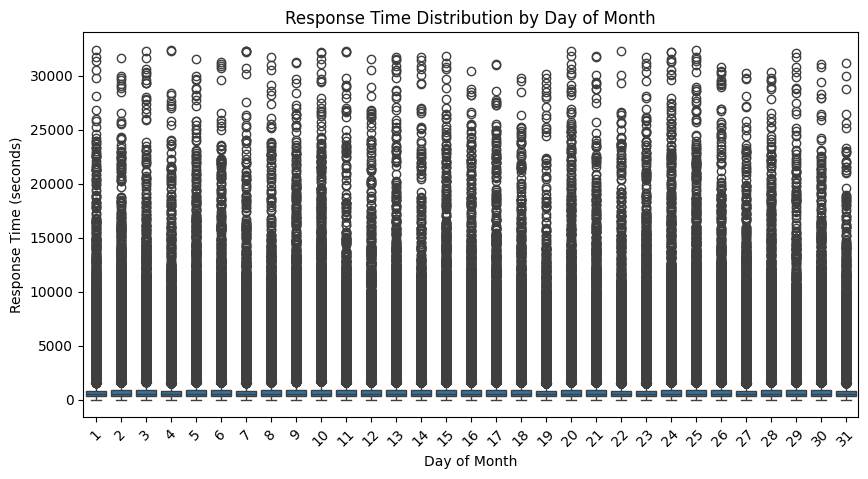

In [22]:
plt.figure(figsize=(10,5))
sns.boxplot(x=main_df['incident_datetime'].dt.day,y=main_df['incident_response_seconds_qy'])
plt.xticks(rotation=45)
plt.title("Response Time Distribution by Day of Month")
plt.xlabel("Day of Month")
plt.ylabel("Response Time (seconds)")
plt.show()

<Axes: xlabel='incident_datetime', ylabel='incident_response_seconds_qy'>

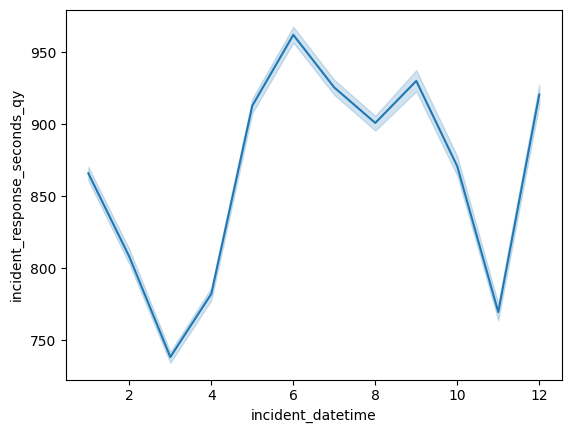

In [23]:
sns.lineplot(
    x=main_df['incident_datetime'].dt.month,
    y=main_df['incident_response_seconds_qy'],
    estimator='mean'
)

In [24]:
main_df.groupby(main_df["incident_datetime"].dt.to_period("M")).size()

incident_datetime
2024-01    134105
2024-02    121680
2024-03    129449
2024-04    126314
2024-05    140611
2024-06    138783
2024-07    139593
2024-08    133068
2024-09    130219
2024-10    138879
2024-11    129544
2024-12    138751
2025-01    138016
2025-02    120301
2025-03    132609
2025-04    132074
2025-05    138231
2025-06    140120
2025-07    142239
2025-08    135901
Freq: M, dtype: int64

In [25]:
time_df = main_df[['incident_datetime', 'incident_response_seconds_qy']]

In [26]:
time_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2680487 entries, 0 to 2680486
Data columns (total 2 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   incident_datetime             datetime64[ns]
 1   incident_response_seconds_qy  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 40.9 MB


In [27]:
time_df.isna().sum()

incident_datetime                    0
incident_response_seconds_qy    155559
dtype: int64

In [28]:
time_df=time_df.set_index('incident_datetime')

In [29]:
time_df

,incident_response_seconds_qy
incident_datetime,
2025-01-01 00:00:12,NaN
2025-01-01 00:01:53,454.0
2025-01-01 00:01:58,0.0
2025-01-01 00:03:42,654.0
2025-01-01 00:04:36,284.0
...,...
2024-12-31 01:02:12,NaN
2024-12-31 01:02:47,550.0
2024-12-31 01:02:55,281.0


In [30]:
(time_df.resample("T").size()).max()

/var/folders/34/1yg1tqgd1b96v45w9k29prnw0000gn/T/ipykernel_1003/2167657732.py:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  (time_df.resample("T").size()).max()


np.int64(23)

In [31]:
time_df.resample("H").size()

/var/folders/34/1yg1tqgd1b96v45w9k29prnw0000gn/T/ipykernel_1003/965794262.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  time_df.resample("H").size()


incident_datetime
2024-01-01 00:00:00    224
2024-01-01 01:00:00    253
2024-01-01 02:00:00    217
2024-01-01 03:00:00    186
2024-01-01 04:00:00    168
                      ... 
2025-08-31 19:00:00    201
2025-08-31 20:00:00    223
2025-08-31 21:00:00    194
2025-08-31 22:00:00    215
2025-08-31 23:00:00    169
Freq: h, Length: 14616, dtype: int64

In [32]:
## incident countsforecast

In [33]:
time_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2680487 entries, 2025-01-01 00:00:12 to 2024-12-31 01:04:35
Data columns (total 1 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   incident_response_seconds_qy  float64
dtypes: float64(1)
memory usage: 40.9 MB


In [34]:
time_df.isna().sum()

incident_response_seconds_qy    155559
dtype: int64

In [35]:
hourly_counts = time_df.resample("H").size()
hourly_counts = hourly_counts.to_frame(name="incident_count")


/var/folders/34/1yg1tqgd1b96v45w9k29prnw0000gn/T/ipykernel_1003/1160403121.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_counts = time_df.resample("H").size()


In [36]:
hourly_counts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14616 entries, 2024-01-01 00:00:00 to 2025-08-31 23:00:00
Freq: h
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   incident_count  14616 non-null  int64
dtypes: int64(1)
memory usage: 228.4 KB


In [37]:
hourly_counts = time_df.resample("H").size()


/var/folders/34/1yg1tqgd1b96v45w9k29prnw0000gn/T/ipykernel_1003/699213276.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_counts = time_df.resample("H").size()


In [38]:
hourly_counts.isna().sum()


np.int64(0)

In [39]:
hourly_counts.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 14616 entries, 2024-01-01 00:00:00 to 2025-08-31 23:00:00
Freq: h
Series name: None
Non-Null Count  Dtype
--------------  -----
14616 non-null  int64
dtypes: int64(1)
memory usage: 228.4 KB


In [40]:
hourly_counts

incident_datetime
2024-01-01 00:00:00    224
2024-01-01 01:00:00    253
2024-01-01 02:00:00    217
2024-01-01 03:00:00    186
2024-01-01 04:00:00    168
                      ... 
2025-08-31 19:00:00    201
2025-08-31 20:00:00    223
2025-08-31 21:00:00    194
2025-08-31 22:00:00    215
2025-08-31 23:00:00    169
Freq: h, Length: 14616, dtype: int64

<Axes: xlabel='incident_datetime'>

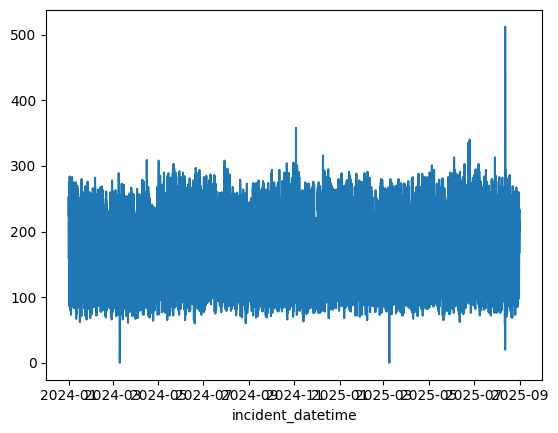

In [41]:
sns.lineplot(data=hourly_counts)

In [42]:
hourly_counts.dtype

dtype('int64')

In [43]:
#hourly_counts.squeeze()

In [44]:
pd.date_range(hourly_counts.index.min(),
              hourly_counts.index.max(),
                freq="H").difference(hourly_counts.index)


/var/folders/34/1yg1tqgd1b96v45w9k29prnw0000gn/T/ipykernel_1003/1843740187.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pd.date_range(hourly_counts.index.min(),


DatetimeIndex([], dtype='datetime64[ns]', freq='h')

<Axes: xlabel='incident_datetime'>

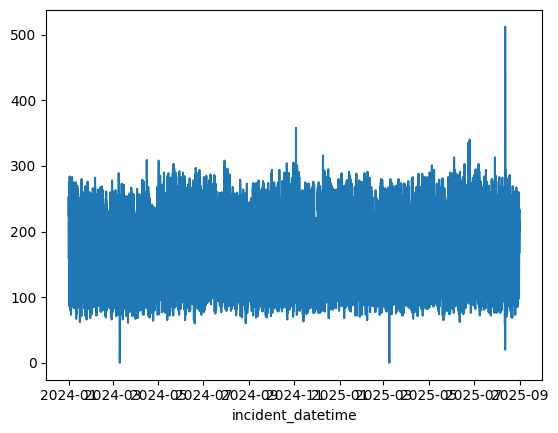

In [45]:
sns.lineplot(data=hourly_counts)

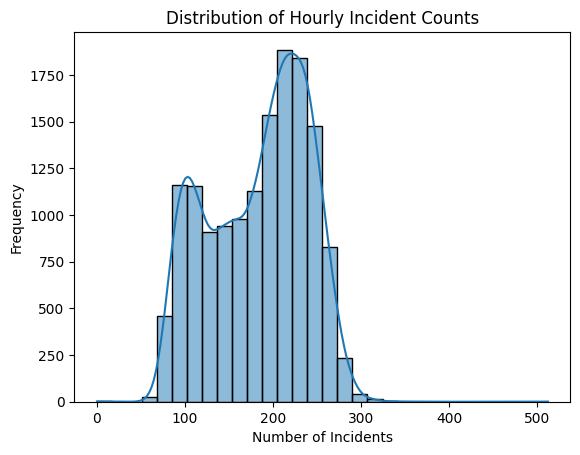

In [46]:
sns.histplot(hourly_counts, bins=30, kde=True)
plt.title("Distribution of Hourly Incident Counts")
plt.xlabel("Number of Incidents")
plt.ylabel("Frequency")
plt.show()

In [47]:
hourly_counts = hourly_counts.sort_index()

In [48]:
hourly_counts

incident_datetime
2024-01-01 00:00:00    224
2024-01-01 01:00:00    253
2024-01-01 02:00:00    217
2024-01-01 03:00:00    186
2024-01-01 04:00:00    168
                      ... 
2025-08-31 19:00:00    201
2025-08-31 20:00:00    223
2025-08-31 21:00:00    194
2025-08-31 22:00:00    215
2025-08-31 23:00:00    169
Freq: h, Length: 14616, dtype: int64

In [49]:
hourly_counts=pd.DataFrame(hourly_counts, columns=['incident_count'])

In [50]:
hourly_counts

,incident_count
incident_datetime,
2024-01-01 00:00:00,224
2024-01-01 01:00:00,253
2024-01-01 02:00:00,217
2024-01-01 03:00:00,186
2024-01-01 04:00:00,168
...,...
2025-08-31 19:00:00,201
2025-08-31 20:00:00,223
2025-08-31 21:00:00,194


In [51]:
hourly_counts['diff'] = hourly_counts['incident_count'].diff()

In [52]:
hourly_counts

,incident_count,diff
incident_datetime,,
2024-01-01 00:00:00,224,NaN
2024-01-01 01:00:00,253,29.0
2024-01-01 02:00:00,217,-36.0
2024-01-01 03:00:00,186,-31.0
2024-01-01 04:00:00,168,-18.0
...,...,...
2025-08-31 19:00:00,201,-33.0
2025-08-31 20:00:00,223,22.0
2025-08-31 21:00:00,194,-29.0


In [53]:
hourly_counts.isna().sum()

incident_count    0
diff              1
dtype: int64

In [54]:
hourly_counts = hourly_counts.dropna()

In [55]:
hourly_counts

,incident_count,diff
incident_datetime,,
2024-01-01 01:00:00,253,29.0
2024-01-01 02:00:00,217,-36.0
2024-01-01 03:00:00,186,-31.0
2024-01-01 04:00:00,168,-18.0
2024-01-01 05:00:00,171,3.0
...,...,...
2025-08-31 19:00:00,201,-33.0
2025-08-31 20:00:00,223,22.0
2025-08-31 21:00:00,194,-29.0


<Axes: xlabel='incident_datetime', ylabel='incident_count'>

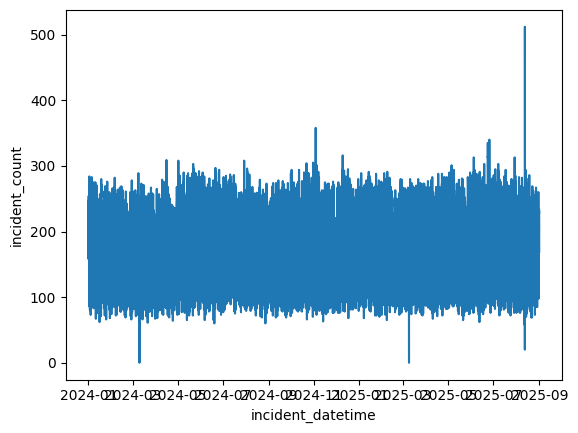

In [56]:
sns.lineplot(data=hourly_counts, x=hourly_counts.index, y='incident_count')

<Axes: xlabel='incident_datetime', ylabel='diff'>

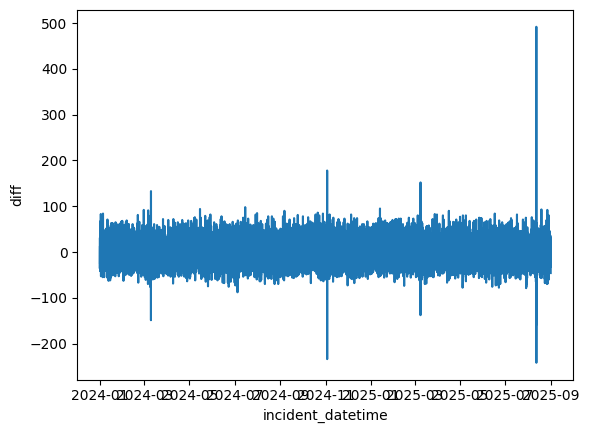

In [57]:
sns.lineplot(data=hourly_counts, x=hourly_counts.index, y='diff')

In [58]:
hourly_counts.index.to_series().diff().value_counts().head()


incident_datetime
0 days 01:00:00    14614
Name: count, dtype: int64

In [59]:
hourly_counts.sort_values(by='diff', ascending=False).head(5)


,incident_count,diff
incident_datetime,,
2025-08-12 13:00:00,512,492.0
2024-11-03 01:00:00,358,178.0
2025-03-09 03:00:00,152,152.0
2024-03-10 03:00:00,133,133.0
2024-07-15 09:00:00,262,98.0


In [60]:

hourly_counts.loc['2025-08-12 11:00:00':'2025-08-12 15:00:00']

,incident_count,diff
incident_datetime,,
2025-08-12 11:00:00,179,-48.0
2025-08-12 12:00:00,20,-159.0
2025-08-12 13:00:00,512,492.0
2025-08-12 14:00:00,270,-242.0
2025-08-12 15:00:00,255,-15.0


Detected an abnormal spike on 2025-08-12 (13:00 = 512 incidents). Likely caused by aggregation or missing hour issue at 12:00. I will verify raw records and check for duplicates before modeling.

In [61]:
check_df = hourly_counts.copy()

In [62]:
check_df

,incident_count,diff
incident_datetime,,
2024-01-01 01:00:00,253,29.0
2024-01-01 02:00:00,217,-36.0
2024-01-01 03:00:00,186,-31.0
2024-01-01 04:00:00,168,-18.0
2024-01-01 05:00:00,171,3.0
...,...,...
2025-08-31 19:00:00,201,-33.0
2025-08-31 20:00:00,223,22.0
2025-08-31 21:00:00,194,-29.0


In [63]:
check_df.loc["2025-08-12 11:00:00":"2025-08-12 15:00:00"]


,incident_count,diff
incident_datetime,,
2025-08-12 11:00:00,179,-48.0
2025-08-12 12:00:00,20,-159.0
2025-08-12 13:00:00,512,492.0
2025-08-12 14:00:00,270,-242.0
2025-08-12 15:00:00,255,-15.0


A big spike (+492) happened on 2025-08-12 at 13:00.
The hour before has a very low number (20).
This looks unusual.
I will check the raw data to see if it is real or a data problem

In [64]:
hourly_counts.loc["2025-08-12"]


,incident_count,diff
incident_datetime,,
2025-08-12 00:00:00,170,32.0
2025-08-12 01:00:00,139,-31.0
2025-08-12 02:00:00,118,-21.0
2025-08-12 03:00:00,102,-16.0
2025-08-12 04:00:00,58,-44.0
2025-08-12 05:00:00,91,33.0
2025-08-12 06:00:00,105,14.0
2025-08-12 07:00:00,148,43.0
2025-08-12 08:00:00,189,41.0


In [65]:
hourly_counts.loc["2025-08-12 12:00:00", "incident_count"] = hourly_counts.loc["2025-08-12 00:00:00":"2025-08-12 11:00:00", "incident_count"].median()
hourly_counts.loc["2025-08-12 13:00:00", "incident_count"] = hourly_counts.loc["2025-08-12 14:00:00":"2025-08-12 23:00:00", "incident_count"].median()

/var/folders/34/1yg1tqgd1b96v45w9k29prnw0000gn/T/ipykernel_1003/3332993363.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '143.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  hourly_counts.loc["2025-08-12 12:00:00", "incident_count"] = hourly_counts.loc["2025-08-12 00:00:00":"2025-08-12 11:00:00", "incident_count"].median()


In [66]:
hourly_counts["diff"] = hourly_counts["incident_count"].diff()


/var/folders/34/1yg1tqgd1b96v45w9k29prnw0000gn/T/ipykernel_1003/3828793010.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hourly_counts["diff"] = hourly_counts["incident_count"].diff()


In [67]:
hourly_counts.loc["2025-08-12"]


,incident_count,diff
incident_datetime,,
2025-08-12 00:00:00,170.0,32.0
2025-08-12 01:00:00,139.0,-31.0
2025-08-12 02:00:00,118.0,-21.0
2025-08-12 03:00:00,102.0,-16.0
2025-08-12 04:00:00,58.0,-44.0
2025-08-12 05:00:00,91.0,33.0
2025-08-12 06:00:00,105.0,14.0
2025-08-12 07:00:00,148.0,43.0
2025-08-12 08:00:00,189.0,41.0


In [68]:
hourly_counts['incident_count120'] = hourly_counts['incident_count'].rolling(120).mean()

/var/folders/34/1yg1tqgd1b96v45w9k29prnw0000gn/T/ipykernel_1003/2300771520.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hourly_counts['incident_count120'] = hourly_counts['incident_count'].rolling(120).mean()


<Axes: xlabel='incident_datetime', ylabel='incident_count120'>

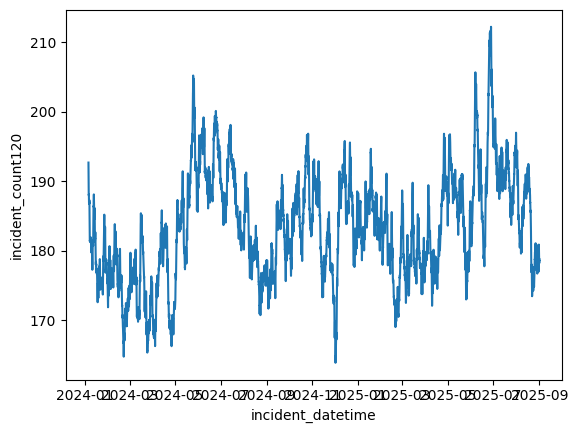

In [69]:
sns.lineplot(data=hourly_counts,x=hourly_counts.index,y='incident_count120')

In [70]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [71]:
decomposition = seasonal_decompose(hourly_counts['incident_count'], model='additive', period=24)

In [72]:
decomposition

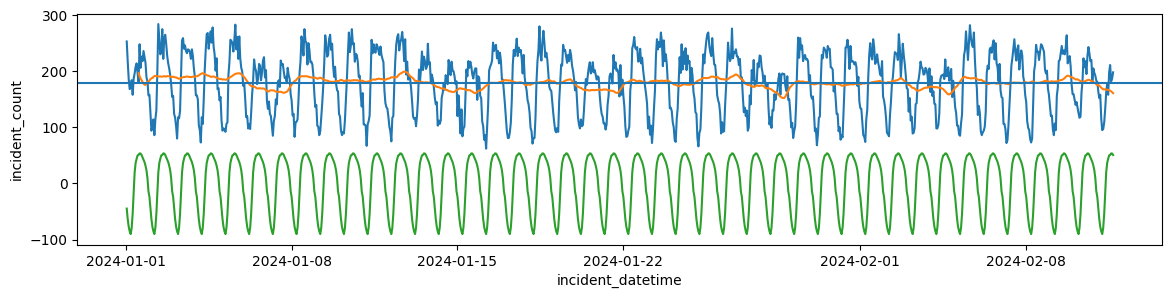

In [73]:
plt.figure(figsize=(14, 3))
sns.lineplot(x=hourly_counts.index[:1000],y=hourly_counts['incident_count'][:1000])
sns.lineplot(x=decomposition.trend.index[:1000], y=decomposition.trend[:1000])
sns.lineplot(decomposition.seasonal[:1000])
plt.axhline(hourly_counts['incident_count'][:1000].mean())


Mavi → gerçek hourly incident_count
Turuncu → trend
Yeşil → seasonal component
Düz çizgi → mean


Look at the green line.
There is a regular wave pattern that repeats every 24 hours.

Strong daily seasonality
Weak trend
Noise var
Stationary değil (seasonality yüzünden)
i need the use sarima
SEASONAL arima

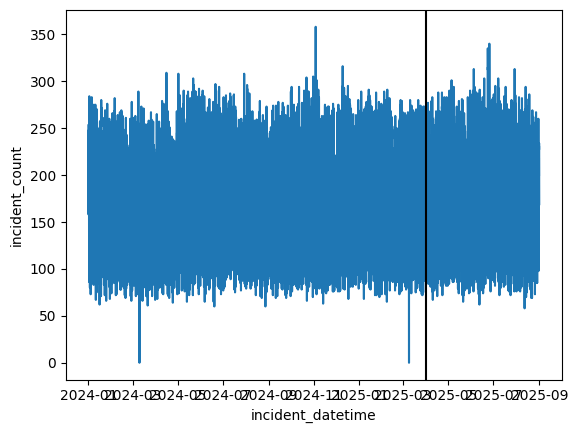

In [74]:
sns.lineplot(data=hourly_counts, x=hourly_counts.index, y='incident_count')
plt.axvline(pd.to_datetime("2025-04-01 12:00:00"), color='black',label='cutoff_date')

In [75]:
hourly_counts[hourly_counts == 0].sum()

incident_count       0.0
diff                 0.0
incident_count120    0.0
dtype: float64

<Axes: xlabel='incident_datetime'>

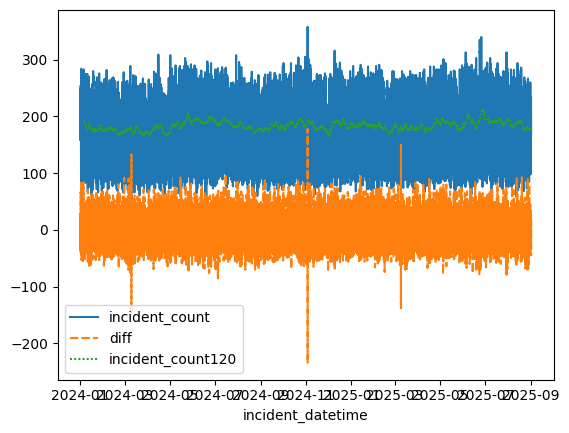

In [76]:
sns.lineplot(data=hourly_counts)

In [77]:
hourly_counts['diff'].describe()

count    14614.000000
mean        -0.005748
std         25.754501
min       -234.000000
25%        -18.000000
50%         -2.000000
75%         16.000000
max        178.000000
Name: diff, dtype: float64

In [78]:
hourly_counts['diff'].abs().sort_values(ascending=False).head(10)


incident_datetime
2024-11-03 02:00:00    234.0
2024-11-03 01:00:00    178.0
2025-03-09 03:00:00    152.0
2024-03-10 02:00:00    149.0
2025-03-09 02:00:00    138.0
2024-03-10 03:00:00    133.0
2024-07-15 09:00:00     98.0
2025-01-13 09:00:00     95.0
2024-05-15 08:00:00     94.0
2025-08-19 09:00:00     93.0
Name: diff, dtype: float64

I noticed large spikes in the differenced series on DST transition dates (March and November). These are not real anomalies but artifacts caused by clock changes. Converting the datetime index to UTC would eliminate this structural issue before forecasting.

In [79]:
hourly_counts.index.min(), hourly_counts.index.max(), hourly_counts.index.duplicated().sum()


(Timestamp('2024-01-01 01:00:00'),
 Timestamp('2025-08-31 23:00:00'),
 np.int64(0))

In [80]:
hourly_counts = hourly_counts[~hourly_counts.index.strftime("%Y-%m-%d").isin(["2024-03-10","2024-11-03","2025-03-09"])]

In [81]:
hourly_counts["diff"] = hourly_counts["incident_count"].diff()

hourly_counts["diff"].abs().sort_values(ascending=False).head(10)


/var/folders/34/1yg1tqgd1b96v45w9k29prnw0000gn/T/ipykernel_1003/2825268877.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hourly_counts["diff"] = hourly_counts["incident_count"].diff()


incident_datetime
2024-07-15 09:00:00    98.0
2025-01-13 09:00:00    95.0
2024-05-15 08:00:00    94.0
2025-08-12 13:00:00    93.0
2025-08-19 09:00:00    93.0
2025-08-27 09:00:00    92.0
2024-02-29 09:00:00    92.0
2024-03-06 08:00:00    91.0
2025-04-16 09:00:00    90.0
2024-09-06 08:00:00    90.0
Name: diff, dtype: float64

I removed the DST transition days because they artificially create large jumps in hourly data.

In [85]:
split_df = hourly_counts.copy()

In [87]:
cutoff_date = pd.to_datetime("2025-04-01 12:00:00")

training_set = split_df[split_df.index < cutoff_date]
test_set = split_df[split_df.index >= cutoff_date]


In [88]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10883 entries, 2024-01-01 01:00:00 to 2025-04-01 11:00:00
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   incident_count     10883 non-null  float64
 1   diff               10882 non-null  float64
 2   incident_count120  10764 non-null  float64
dtypes: float64(3)
memory usage: 340.1 KB


In [89]:
training_set.isna().sum()

incident_count         0
diff                   1
incident_count120    119
dtype: int64

In [ ]:
training_set = training_set.drop(columns=['incident_count120'])

In [91]:
training_set = training_set.dropna()

In [92]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10882 entries, 2024-01-01 02:00:00 to 2025-04-01 11:00:00
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   incident_count  10882 non-null  float64
 1   diff            10882 non-null  float64
dtypes: float64(2)
memory usage: 255.0 KB


In [94]:
test_set = test_set.drop(columns=['incident_count120'])

In [95]:
test_set = test_set.dropna()

In [96]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3660 entries, 2025-04-01 12:00:00 to 2025-08-31 23:00:00
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   incident_count  3660 non-null   float64
 1   diff            3660 non-null   float64
dtypes: float64(2)
memory usage: 85.8 KB


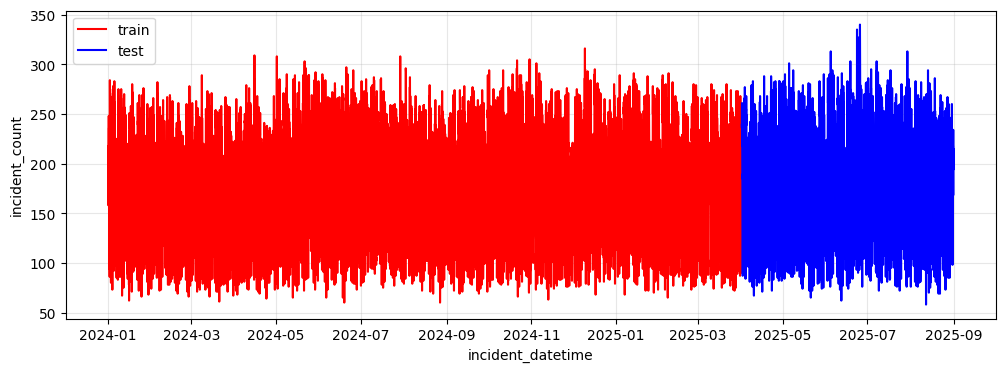

In [97]:
plt.figure(figsize=(12,4))

sns.lineplot(data=training_set, x=training_set.index, y='incident_count', label='train', color='red')
sns.lineplot(data=test_set,  x=test_set.index,  y='incident_count', label='test',  color='blue')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

In [98]:
training_set=training_set.drop(columns=['diff'])
test_set=test_set.drop(columns=['diff'])

ADF TEST Amaç: Zaman serisinin durağanlığını (ortalama ve varyansın zamanla değişmemesi) kontrol etmek.

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(train_series)

print("ADF Statistic:", result[0])
print("p-value:", result[1])

In [100]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(training_set['incident_count'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])

ADF Statistic: -11.72483688192259
p-value: 1.385533519276388e-21


In [ ]:
#stationary_

In [101]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [104]:
model = SARIMAX(training_set['incident_count'], order=(1,0,1), seasonal_order=(1,1,1,24))
model_fit = model.fit()

/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


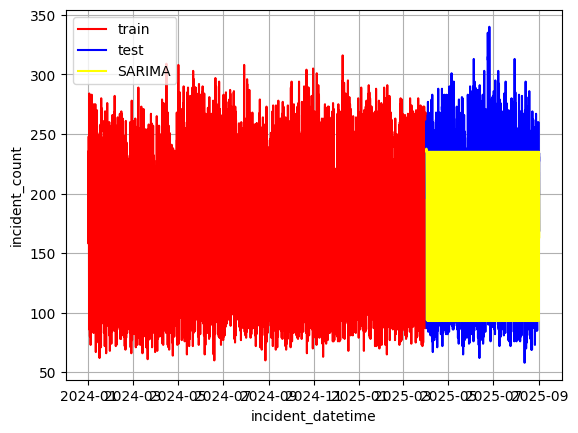

In [106]:
sarima_predictions = model_fit.get_forecast(steps=len(test_set)).predicted_mean

sns.lineplot(data=training_set, x=training_set.index, y='incident_count', label='train', color='red')
sns.lineplot(data=test_set,  x=test_set.index,  y='incident_count', label='test',  color='blue')
sns.lineplot(x=test_set.index,y=sarima_predictions,color='yellow',label='SARIMA')
plt.grid()

In [107]:
len(test_set)



3660

The forecast becomes flat in long horizons because the model uses its own predictions to generate future values. This causes error accumulation and the model slowly moves toward the average value.

In [111]:
actual_168 = test_set["incident_count"].iloc[:168]

/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


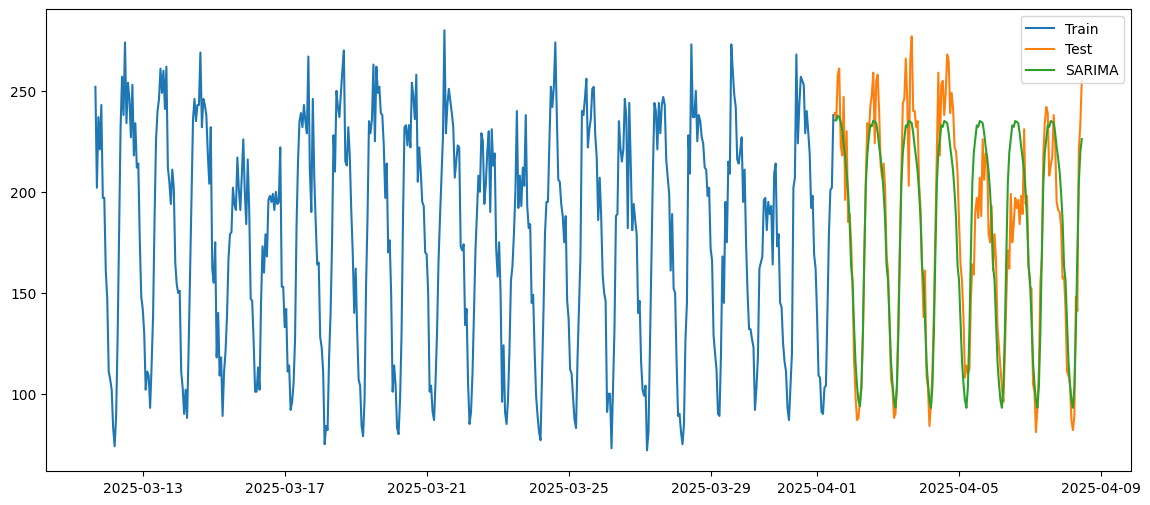

In [ ]:
short_pred = model_fit.get_forecast(steps=168).predicted_mean

plt.figure(figsize=(14,6))
plt.plot(training_set.index[-500:], training_set["incident_count"][-500:], label="Train")
plt.plot(test_set.index[:168], test_set["incident_count"][:168], label="Test")
plt.plot(test_set.index[:168], short_pred, label="SARIMA")
plt.legend()
plt.show()

In [109]:
def model_evulation(actual_values,predict_values):
    print(f'root_mean_squared_error :{root_mean_squared_error(actual_values,predict_values)}')
    print(f'mean_squared_error :{mean_squared_error(actual_values,predict_values)}')
    print(f'mean_absolute_error :{mean_absolute_error(actual_values,predict_values)}')
    print(f'r2_score :{r2_score(actual_values,predict_values)}')


In [113]:
model_evulation(test_set,sarima_predictions)

root_mean_squared_error :25.54603595673547
mean_squared_error :652.5999531028215
mean_absolute_error :20.084064071703796
r2_score :0.8018706537203765


In [112]:
model_evulation(actual_168,short_pred)

root_mean_squared_error :22.044982885364913
mean_squared_error :485.9812704160319
mean_absolute_error :17.688659256766613
r2_score :0.8292568420669624


The baseline just repeats yesterday’s hourly value. I used it to check if SARIMA is really better than a simple repetition.

In [114]:
baseline_pred = test_set['incident_count'].shift(24)


In [115]:
baseline_pred.isna().sum()

np.int64(24)

In [116]:
baseline_pred = baseline_pred.dropna()

In [117]:
baseline_actual = test_set['incident_count'].iloc[24:]

In [118]:
model_evulation(baseline_actual, baseline_pred)


root_mean_squared_error :29.7975336949458
mean_squared_error :887.8930143014302
mean_absolute_error :22.844334433443343
r2_score :0.730403306295119


Ben şunu yaptım:
Çok basit bir model yaptım.
Bu model sadece dünün aynı saatini tekrar ediyor.
SARIMA bundan daha iyi mi diye baktım.
Eğer daha iyiyse → model mantıklı

The model predicts future hourly incident counts.
It helps us see what may happen next.
It is useful for short-term planning.

In [119]:
import pickle

with open("sarima_model.pkl", "wb") as u:
    pickle.dump(model_fit, u)